<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Python: Projeto Final
Caderno de **Aula**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução ao Kaggle;</li>
  <li>Exploração de dados;</li>
  <li>Transformação e limpeza de dados;</li>
  <li>Visualização de dados;</li>
  <li>Storytelling.</li>
</ol>


---

# **Aulas**

## 1\. Introdução ao Kaggle

[Kaggle](https://www.kaggle.com/) é a maior comunidade online de ciência de dados e aprendizado de máquina. A plataforma permite que usuários encontrem e publiquem conjuntos de **dados**, construam e compartilhem **notebooks** (como este do Google Colab) e participem de **competições** (que pagam muito dinheiro as vezes) e desafios de dados. 

> Vamos publicar nosso notebook de exercícios na plataforma web do Kaggle para que você possa compartilhar tudo o que você aprendeu neste curso e compor o seu portfólio.

## 2\. Exploração de Dados

Vamos explorar dados de crédito presentes neste neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv). Os dados estão no formato CSV e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de **default**, que indica se um cliente é adimplente(`default = 0`), ou inadimplente (`default = 1`), ou seja, queremos entender o porque um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Uma descrição completa dos atributos está abaixo.

> O atributo de interesse (`default`) é conhecido como **variável resposta** ou **variável dependente**, já os demais atributos que buscam explicá-la (`idade`, `salário`, etc.) são conhecidas como **variáveis explicatívas**, **variáveis independentes** ou até **variáveis preditoras**.



| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



Vamos começar lendos os dados num dataframe `pandas`.

In [70]:
import pandas as pd

In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

In [72]:
df.head(n=10)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
5,713061558,0,44,M,2,mestrado,casado,$40K - $60K,blue,36,3,2,1,"4.010,69","1.088,07",24
6,810347208,0,51,M,4,NaN,casado,$120K +,gold,46,6,3,1,"34.516,72","1.330,87",31
7,818906208,0,32,M,0,ensino medio,NaN,$60K - $80K,silver,27,2,2,2,"29.081,49","1.538,32",36
8,710930508,0,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,36,5,0,2,"22.352,50","1.350,14",24
9,719661558,0,48,M,2,mestrado,solteiro,$80K - $120K,blue,36,6,3,3,"11.656,41","1.441,73",32


Com o dados em mãos, vamos conhecer um pouco melhor a estrutura do nosso conjunto de dados.

### **2.1. Estrutura** 

In [73]:
df.shape # retorna uma tupla (qtd linhas, qtd colunas)

(10127, 16)

In [74]:
df[df['default'] == 0].shape

(8500, 16)

In [75]:
df[df['default'] == 1].shape

(1627, 16)

In [76]:
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

In [77]:
print(f"A proporcão clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporcão clientes adimplentes é de 83.93%
A proporcão clientes inadimplentes é de 16.07%


### **2.2. Schema** 

In [78]:
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


 - Colunas e seus respectivos tipos de dados.

In [79]:
#  Analisando tipo de dados 
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

 - Atributos **categóricos**.

In [80]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


 - Atributos **numéricos**.

In [81]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **2.3. Dados faltantes** 

Dados faltantes podem ser:

 - Vazios (`""`);
 - Nulos (`None`);
 - Não disponíveis ou aplicaveis (`na`, `NA`, etc.);
 - Não numérico (`nan`, `NaN`, `NAN`, etc).

In [82]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


Podemos verificar quais colunas possuem dados faltantes.

In [83]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

 - A função abaixo levanta algumas estatisticas sobre as colunas dos dados faltantes.

In [84]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

In [85]:
stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [86]:
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [87]:
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


## 3\. Transformação e limpeza de dados

Agora que conhecemos melhor a natureza do nosso conjunto de dados, vamos conduzir uma atividade conhecida como *data wrangling* que consiste na transformação e limpeza dos dados do conjunto para que possam ser melhor analisados. Em especial, vamos remover:

 - Corrigir o *schema* das nossas colunas;
 - Remover os dados faltantes.

### **3.1. Correção de schema** 

Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas (`dtype = object`).

In [88]:
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [89]:
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


Vamos criar uma função `lambda` para limpar os dados. Mas antes, vamos testar sua aplicação através do método funcional `map`:

In [90]:
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

valores_originais = ['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
valores_limpos = list(map(fn, valores_originais))

print(valores_originais)
print(valores_limpos)

['12.691,51', '8.256,96', '3.418,56', '3.313,03', '4.716,22']
[12691.51, 8256.96, 3418.56, 3313.03, 4716.22]


Com a função `lambda` de limpeza pronta, basta aplica-la nas colunas de interesse.

In [91]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

Vamos descrever novamente o *schema*:

In [92]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

 - Atributos **categóricos**.

In [93]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


 - Atributos **numéricos**.

In [94]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


### **3.2. Remoção de dados faltantes** 

Como o pandas está ciente do que é um dados faltante, a remoção das linhas problemáticas é trivial.

In [95]:
df.dropna(inplace=True)

Vamos analisar a estrutura dos dados novamente.

In [96]:
df.shape

(7081, 16)

In [97]:
df[df['default'] == 0].shape

(5968, 16)

In [98]:
df[df['default'] == 1].shape

(1113, 16)

In [99]:
qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

In [100]:
print(f"A proporcão adimplentes ativos é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão adimplentes ativos é de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão clientes inadimplentes é de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


## 4\. Visualização de dados

Os dados estão prontos, vamos criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplencia. E para isso, vamos sempre comparar a base com todos os clientes com a base de adimplentes e inadimplentes.

Começamos então importando os pacotes de visualização e separando os clientes adimplentes e inadimplentes 

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [102]:
df_adimplente = df[df['default'] == 0]

In [103]:
df_inadimplente = df[df['default'] == 1]

### **4.1. Visualizações categóricas** 

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos categóricos.

In [104]:
df.select_dtypes('object').head(n=5)

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


* Escolaridade

default                 0     1  Total
escolaridade                          
doutorado             637   152    789
ensino medio         1416   237   1653
graduacao             712   132    844
mestrado             2185   406   2591
sem educacao formal  1018   186   1204
Total                5968  1113   7081


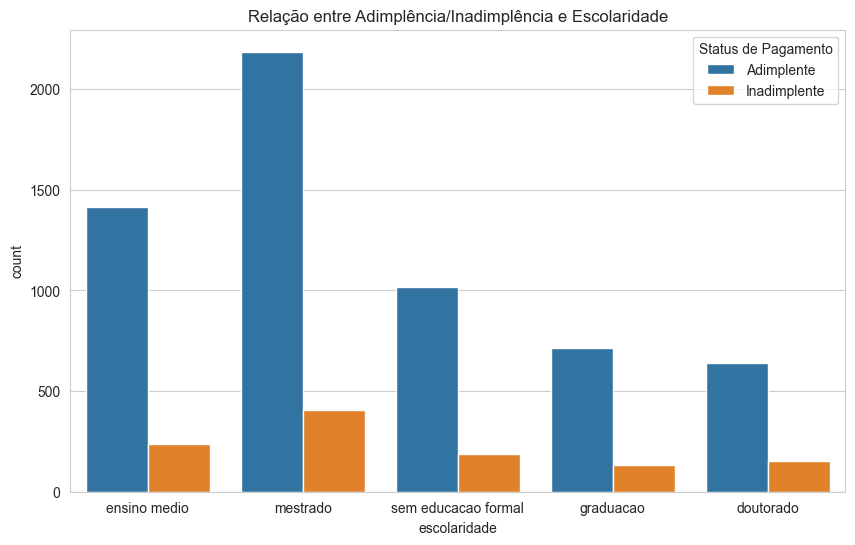

In [113]:
# Visualizando a tabela de frequência
tabela_frequencia = pd.crosstab(df['escolaridade'], df['default'], margins=True, margins_name='Total')
print(tabela_frequencia)

# Mapeando os valores 0 e 1 para 'Adimplente' e 'Inadimplente' apenas para a legenda do gráfico
labels = {0: 'Adimplente', 1: 'Inadimplente'}

# Visualizando a relação usando um gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
sns.countplot(x='escolaridade', hue='default', data=df)
plt.title('Relação entre Adimplência/Inadimplência e Escolaridade')
plt.legend(title='Status de Pagamento', labels=[labels[val] for val in df['default'].unique()])
plt.show()


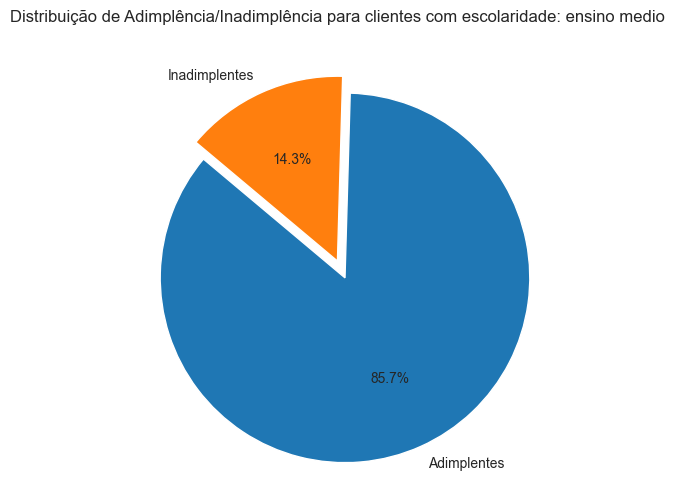

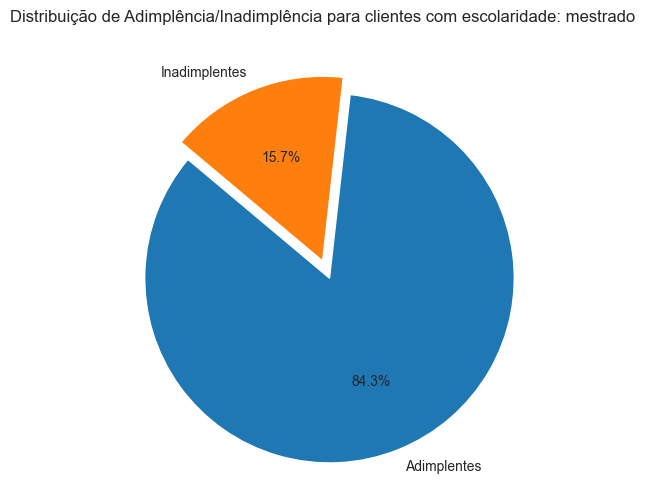

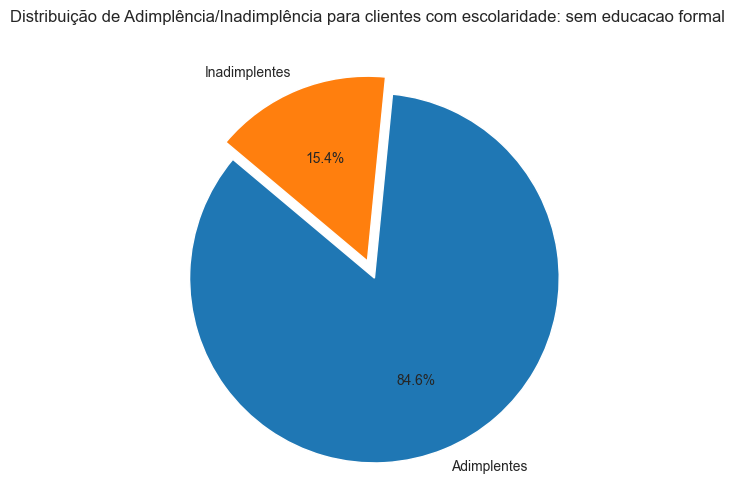

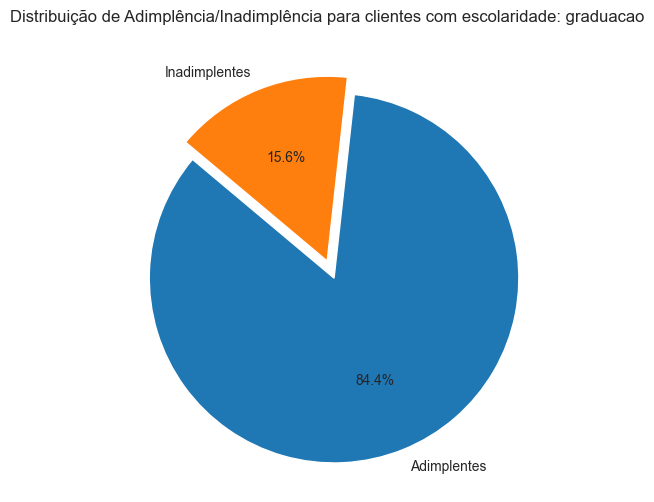

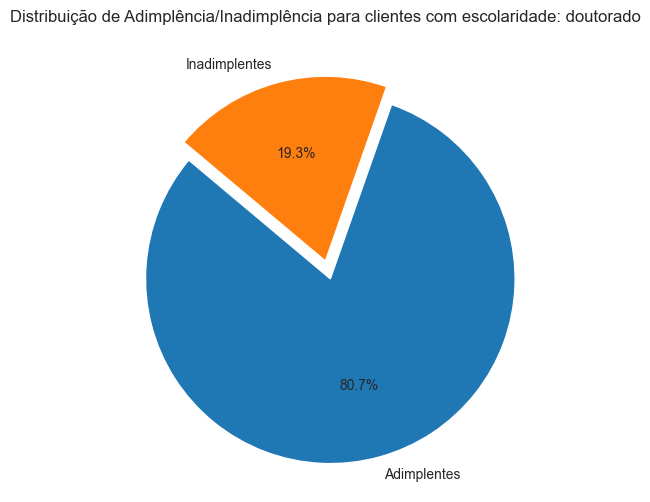

In [124]:
# Visualizando os valores únicos da coluna 'escolaridade'
valores_escolaridade = df['escolaridade'].unique()

# Para cada valor único de 'escolaridade', calcular a porcentagem de adimplentes e inadimplentes
for valor in valores_escolaridade:
    subconjunto = df[df['escolaridade'] == valor]
    total = len(subconjunto)
    
    # Calcular a porcentagem de adimplentes e inadimplentes
    adimplentes = subconjunto[subconjunto['default'] == 0]['default'].count()
    inadimplentes = subconjunto[subconjunto['default'] == 1]['default'].count()

    porcentagem_adimplentes = (adimplentes / total) * 100
    porcentagem_inadimplentes = (inadimplentes / total) * 100

    # Criar um gráfico de pizza
    labels = ['Adimplentes', 'Inadimplentes']
    sizes = [porcentagem_adimplentes, porcentagem_inadimplentes]
    explode = (0.1, 0)  # Explodir a primeira fatia (Adimplentes)
    
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribuição de Adimplência/Inadimplência para clientes com escolaridade: {valor}')
    plt.show()

Observou-se que há proporcionalmente mais inadiplentes com doutorado do que sem escolaridade, vamos checar a quantidade de cada categoria.

escolaridade
mestrado               2591
ensino medio           1653
sem educacao formal    1204
graduacao               844
doutorado               789
Name: count, dtype: int64


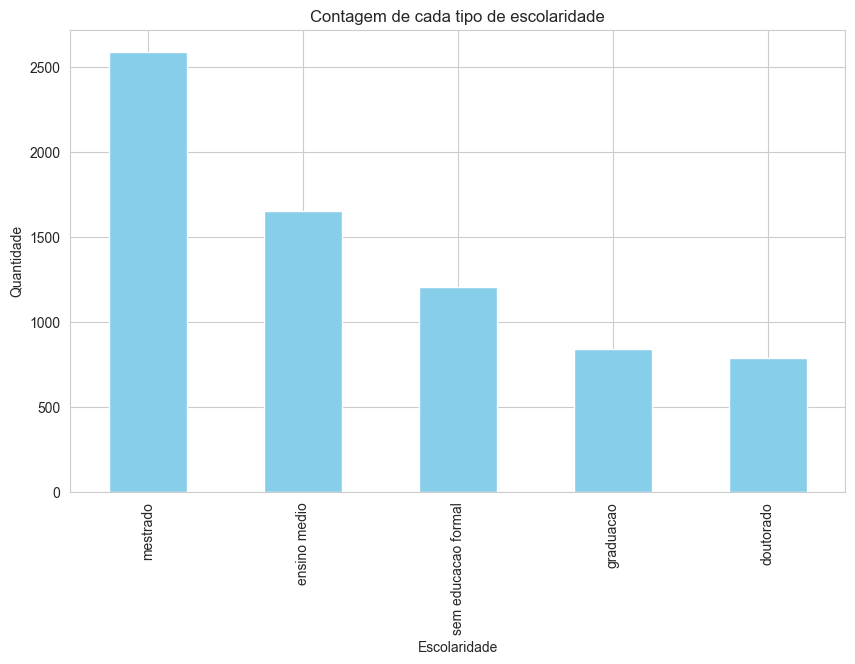

In [131]:
contagem_escolaridade = df['escolaridade'].value_counts()
print(contagem_escolaridade)
# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
contagem_escolaridade.plot(kind='bar', color='skyblue')
plt.title('Contagem de cada tipo de escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Quantidade')
plt.show()


* Salário

salario_anual
menos que $40K    2792
$40K - $60K       1412
$80K - $120K      1202
$60K - $80K       1103
$120K +            572
Name: count, dtype: int64


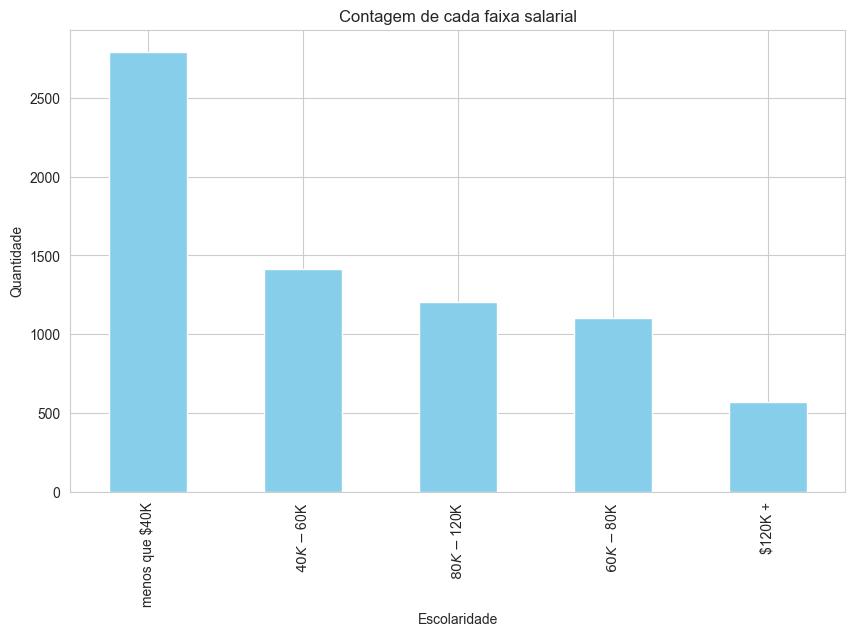

In [134]:
contagem_faixa_salarial = df['salario_anual'].value_counts()
print(contagem_faixa_salarial)
# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
contagem_faixa_salarial.plot(kind='bar', color='skyblue')
plt.title('Contagem de cada faixa salarial')
plt.xlabel('Escolaridade')
plt.ylabel('Quantidade')
plt.show()


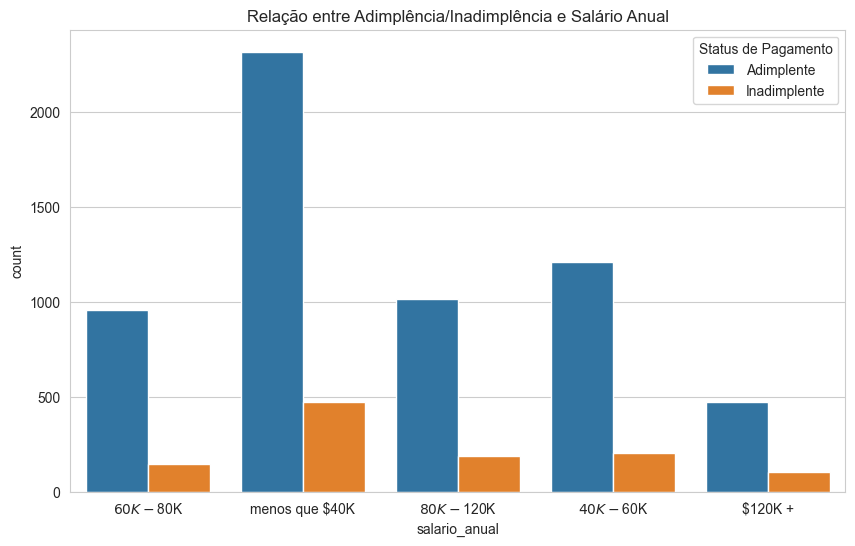

In [119]:
# Visualizando a tabela de frequência
tabela_frequencia = pd.crosstab(df['salario_anual'], df['default'], margins=True, margins_name='Total')

# Mapeando os valores 0 e 1 para 'Adimplente' e 'Inadimplente' apenas para a legenda do gráfico
labels = {0: 'Adimplente', 1: 'Inadimplente'}

# Visualizando a relação usando um gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
sns.countplot(x='salario_anual', hue='default', data=df)
plt.title('Relação entre Adimplência/Inadimplência e Salário Anual')
plt.legend(title='Status de Pagamento', labels=[labels[val] for val in df['default'].unique()])
plt.show()


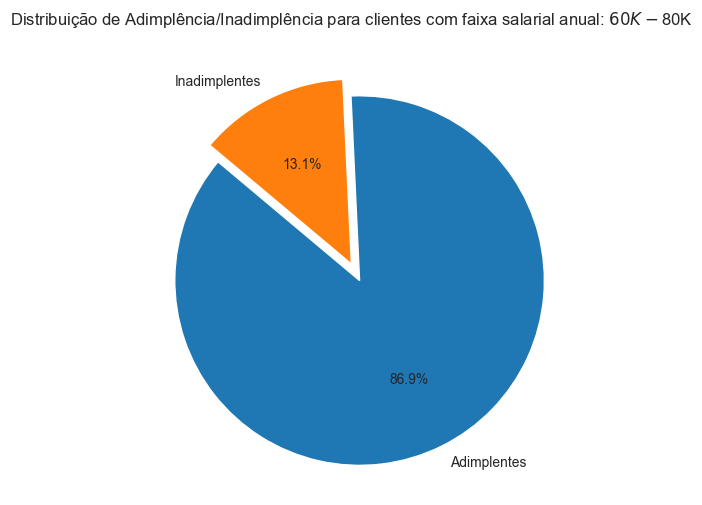

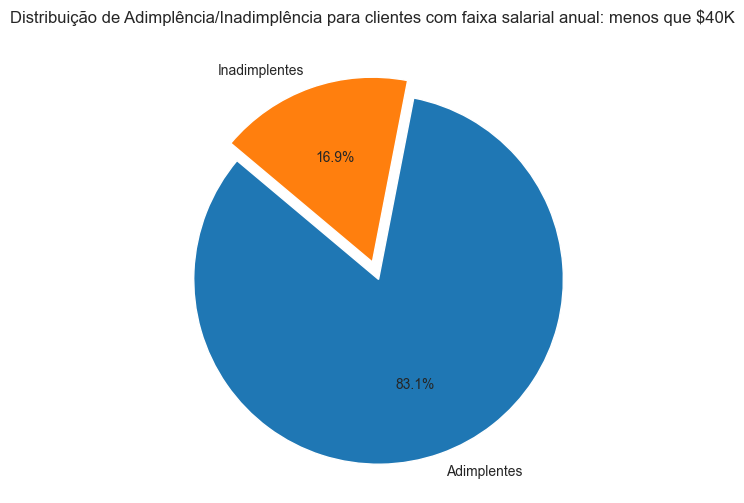

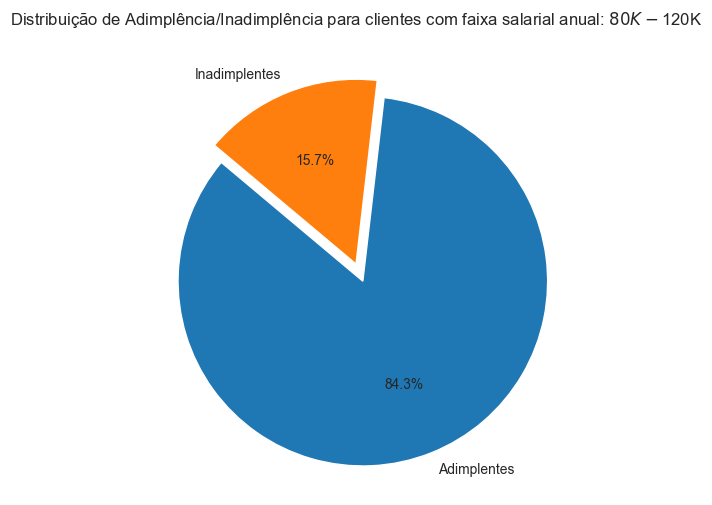

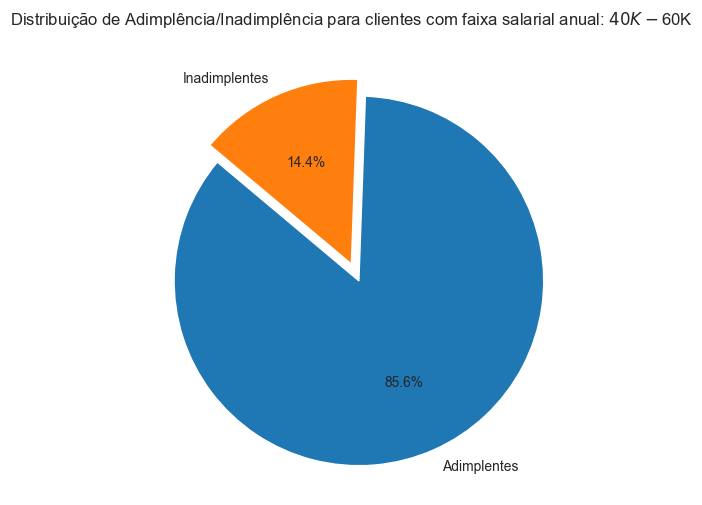

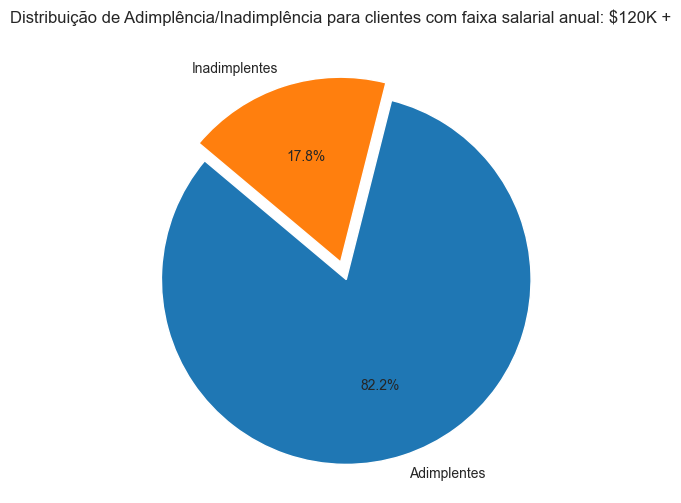

In [126]:
# Visualizando os valores únicos da coluna 'escolaridade'
valores_escolaridade = df['salario_anual'].unique()

# Para cada valor único de 'escolaridade', calcular a porcentagem de adimplentes e inadimplentes
for valor in valores_escolaridade:
    subconjunto = df[df['salario_anual'] == valor]
    total = len(subconjunto)
    
    # Calcular a porcentagem de adimplentes e inadimplentes
    adimplentes = subconjunto[subconjunto['default'] == 0]['default'].count()
    inadimplentes = subconjunto[subconjunto['default'] == 1]['default'].count()

    porcentagem_adimplentes = (adimplentes / total) * 100
    porcentagem_inadimplentes = (inadimplentes / total) * 100

    # Criar um gráfico de pizza
    labels = ['Adimplentes', 'Inadimplentes']
    sizes = [porcentagem_adimplentes, porcentagem_inadimplentes]
    explode = (0.1, 0)  # Explodir a primeira fatia (Adimplentes)
    
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribuição de Adimplência/Inadimplência para clientes com faixa salarial anual: {valor}')
    plt.show()

### **4.2. Visualizações numéricas** 

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos numéricos.

In [107]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


 - Quantidade de Transações nos Últimos 12 Meses

C:\Users\jaime\AppData\Local\Temp\ipykernel_19312\3045762736.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


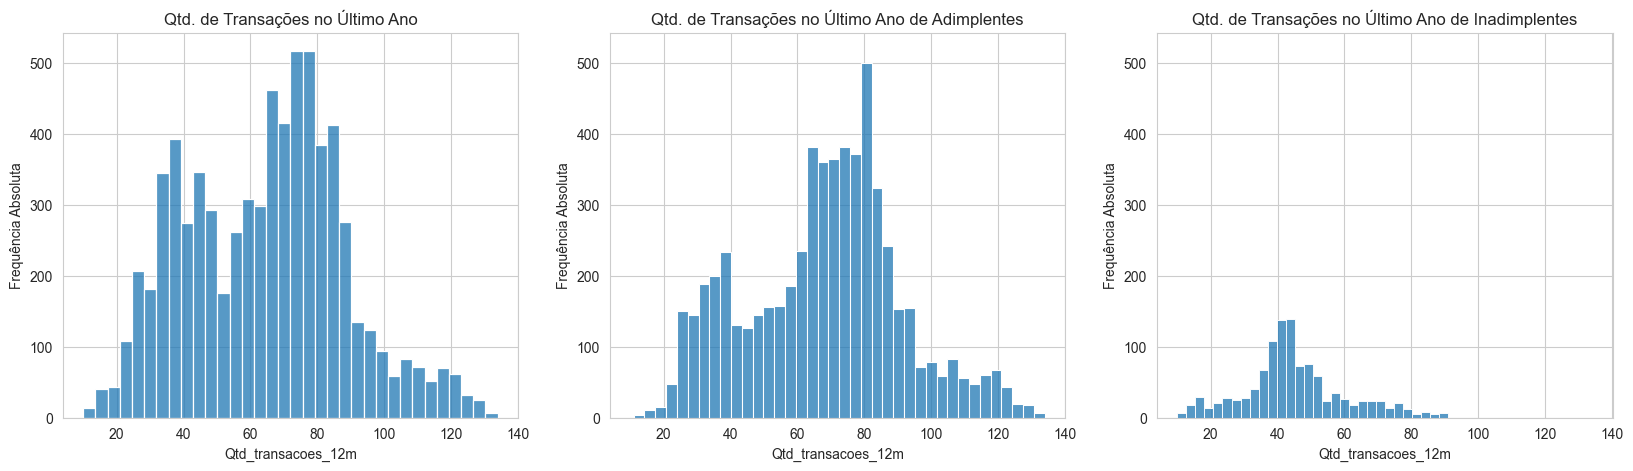

In [108]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

Analisando o mínimo e máximo de cada categoria de cliente

In [141]:
coluna = 'qtd_transacoes_12m'

count = 0

titulos = ['No último ano', 'No último ano de Adiplentes', 'No último ano de Inadiplentes']

for tipo in [df, df_adimplente, df_inadimplente]:
    quantidade_maxima = tipo['qtd_transacoes_12m'].max()
    quantidade_minima = tipo['qtd_transacoes_12m'].min()
    
    # Exibir os resultados
    print(f'Quantidade Máxima de Operações {titulos[count]}: {quantidade_maxima}')
    print(f'Quantidade Mínima  de Operações {titulos[count]}: {quantidade_minima}')
    count+=1
    print()



Quantidade Máxima de Operações No último ano: 134
Quantidade Mínima  de Operações No último ano: 10

Quantidade Máxima de Operações No último ano de Adiplentes: 134
Quantidade Mínima  de Operações No último ano de Adiplentes: 11

Quantidade Máxima de Operações No último ano de Inadiplentes: 91
Quantidade Mínima  de Operações No último ano de Inadiplentes: 10



In [136]:
linhas_maior_que_120 = df[df['qtd_transacoes_12m'] > 120]
linhas_maior_que_120

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
9037,716806383,0,48,M,4,mestrado,casado,$80K - $120K,blue,40,1,3,1,28307.43,9042.73,122
9103,713808633,0,31,F,0,sem educacao formal,divorciado,menos que $40K,silver,23,2,1,2,10850.79,13794.32,127
9146,715209333,0,32,M,0,ensino medio,solteiro,$60K - $80K,blue,36,1,1,1,6224.79,13630.87,124
9154,709257708,0,47,F,2,ensino medio,solteiro,menos que $40K,blue,41,1,2,1,3109.00,14965.27,127
9171,720086358,0,58,M,2,doutorado,casado,$120K +,blue,48,2,1,3,12648.24,14465.72,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10085,717714633,0,49,M,3,sem educacao formal,casado,$120K +,gold,38,4,4,3,14938.08,15277.46,131
10086,824150733,0,43,M,2,ensino medio,casado,$80K - $120K,silver,39,3,3,1,34516.74,16177.49,122
10087,713768358,0,45,M,4,mestrado,solteiro,$40K - $60K,blue,35,3,2,2,7935.29,15380.47,122
10102,720608658,0,33,F,1,sem educacao formal,solteiro,menos que $40K,blue,36,5,3,3,8398.92,16706.66,123


 - Valor das Transações nos Últimos 12 Meses

C:\Users\jaime\AppData\Local\Temp\ipykernel_19312\3932491844.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  figura.show()


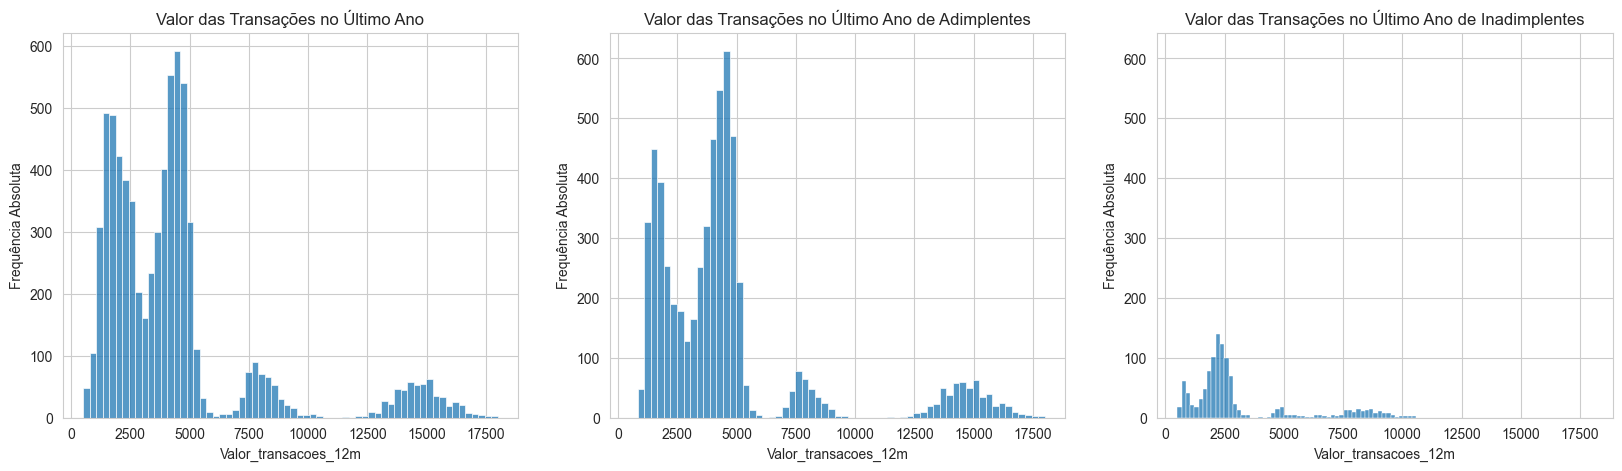

In [109]:
coluna = 'valor_transacoes_12m'
titulos = ['Valor das Transações no Último Ano', 'Valor das Transações no Último Ano de Adimplentes', 'Valor das Transações no Último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

 - Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

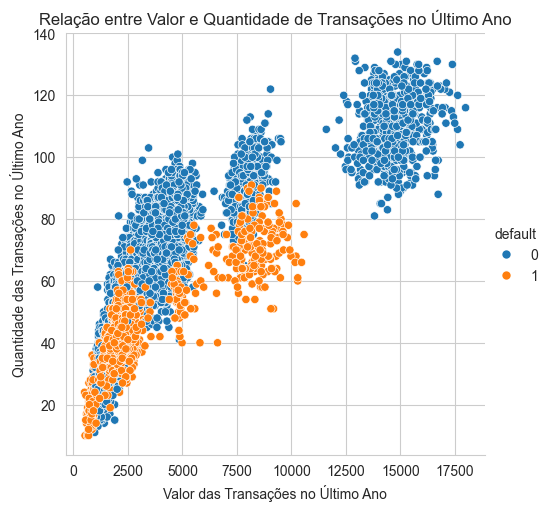

In [110]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

## 5\. Storytelling

O *storytelling* no contexto de dados é um técnica de apresentação de resultados orientado a dados, ou seja, contar uma história baseada nos *insights* que foram gerados através da análise dos dados. Notebooks como este do Google Colab e os do Kaggle são excelentes ferramentas para conduzir e compartilhar *storytelling* de dados devido a natureza texto-código de suas céluas.

Para você montar o seu portifólio, eu sugiro a construção de um notebook com a seguinte estrutura (vou disponibiliza-la nos exercícios):

 1. Título;
 2. Breve descrição do problema;
 3. Código de importação de bibliotecas;
 4. Código o download/carregamento/geração de dados;
 5. Etapa de exploração;
 6. Etapa de limpeza e transformação;
 7. Etapa de análise (com visualizações);
 8. Resumo dos *insights* gerados.

Busquei organizar este notebook desta forma. Ademais, os notebooks presentes na plataforma do Kaggle são excelentes exemplos a serem seguidos, em especial os primeiros colocados em competições.

Para finalizar, algumas dicas:

 1. Estruture seu código sempre de acordo com as boas práticas PEP8, assim ele será mais legível para o leitor;
 2. Sempre se preocupe com a aparência dos seus gráficos, todos devem ter (no mínimo) título no topo e nos eixos;
 3. Use e abuso das células de texto para estruturar seu notebook, siga as mesmas técnicas que eu utilizo nos notebooks do curso para estruturar seu texto.

____

Quando terminar, se possível, entra em contato comigo, eu adoraria ver o seu notebook final pronto! Meu LinkedIn está no topo da página, logo após o logo da EBAC. Espero que você tenha gostado, foi um prazer trabalhar com você!

Até a próxima.

###  **INSIGHTS**

#### *1. Proporção de inadiplência*

Ao fazer o tratamento de dados, houve uma mudança de menos de 1% na proporção de clientes inadiplentes/adiplentes.

* ADIPLENTES
1. *A proporcão adimplentes ativos antes do tratamento era de 83.93%*
2. *A nova proporcão de clientes adimplentes  após o tratamento é de 84.28%*

* INADIPLENTES
1. *A proporcão clientes inadimplentes antes do tratamento era de 16.07%&* 
2. *A nova proporcão de clientes inadimplentes após o tratamento é de é de 15.72%*

#### *2. Relação entre a escolaridade e a inadiplência*

Ao categorizarmos os clientes por sua escolaridade, observou-se ou seguintes pontos:

* Nos clientes com doutorado, cerca de 20% estão inadiplentes, enquanto que nos clientes sem educação formal apenas 15% estão inadiplentes. Isso dar a entender  que pessoas com maior formação se endividam mais. Porém, pontos a se notar são as quantidades de cada categoria que foram analisadas:

    Escolaridade | Quantidade
    --------- | ------
    mestrado      |         2591
    ensino medio   |        1653
    sem educacao formal   | 1204
    graduacao           |    844
    doutorado          |     789

* Os clientes categorizados com formação Ensino Médio possuem  a menor porcentagem de inadiplência; 
* Na base de dados, há mais clientes com mestrado que pessoas apenas com ensino médio;


#### *3. Relação entre a faixa salarial e a inadiplência*
Ao categorizarmos os clientes por sua escolaridade, observou-se ou seguintes pontos:

* De forma análoga a escolaridade, cerca de 18% das pessoas com salário anual maior que R$ 120.000,00 estão inadiplentes, enquanto que entre as pessoas  com faixa salarial anual entre R$60.000,00 e R$80.000,00 apenas 13% estão inadiplentes. 

Salario Anual | Quantidade
--------- | ------
menos que $40K   | 2792
$40K - $60K      |1412
$80K - $120K     | 1202
$60K - $80K       |1103
$120K +            |572
* A  faixa salarial anual menor que R$ 40.000,00 possui 17% de taxa de inadiplência.

#### 4. Quantidade de Transações no Último ano